### **EDA**

El análisis exploratorio de datos es un proceso que permite la identificación de las tendencias dentro de los conjuntos de los datos. Durante el desarrollo de un experimento es importante que logremos identificar la presencia de algunas de estas tendencias o medidas como la existencia de valores faltantes, valores extremos, medidas de valores centrales o de dispersión. Esta información valiosa nos da acceso a relevante conocimiento acerca de nuestro conjunto de datos.

Por ejemplo, la presencia de valores faltantes nos puede indicar o permitirnos pensar que durante la colecta de datos algo no fue tan rigurosa como se planteo. Que posiblemente exista algún sesgo en el conjunto de datos (algo que potencialmente podamos evidenciar mediante un análisis visual). La presencia de valores extremos en muchas ocasiones es un indicador de posibles errores de muestreo, de problemas en la consecución de datos o inclusive de algunas instancias de un problema causado por las personas que llevaron a cabo el muestreo. Como mencionamos en un tema anterior relacionado con la colecta de datos, la implementación de una mala estrategia de colecta de datos en un muestreo por parte de un analista puede llevar a un sesgo. Por ejemplo: en un estudio de el promedio de gastos que una persona estudiante de la ECCI de la Universidad de Costa Rica incurre para llegar a su destino utilizando el sistema de buses público, llegamos a la conclusión que tenemos un promedio dado por un valor x. 

Si una persona ahonda en los datos y descubre que existen valores extremos en el conjunto puede tratar de identificar algunas particularidades del conjunto de datos. Es posible que el recolector de datos únicamente se enfoco (quizás por motivos de indolencia) en obtener datos de personas que viven a 5 kilómetros de la UCR, y los valores extremos representa unos pocos casos que habitan a más de este radio, incluyendo personas que deben atravesar 2 provincias. El recolector de datos no aclaro que el término transporte público se refería a el uso de buses únicamente, y quizás se incluyen transportes como taxis. Estas observaciones únicamente las podemos ver si realizamos un análisis de datos exploratorio.

En este mismo contexto, que sucede si el recolector de datos hubiese realizado este sondeo en la ECCI y reporta que tiene resultados para 250 personas. Sin embargo, a la hora de analizar los datos, identificamos que tenemos valores duplicados (la misma persona respondió el sondeo 10 veces), y que trágicamente tenemos información válida para 140 personas, pero de estas 37 nos han dejado alguna información en blanco, como por ejemplo a que distancia vive usted de la UCR. De nuevo, mediante un análisis exploratorio de datos podemos identificar estas anomalías y solicitar al ente encargado de ejecutar el estudio que:

a.	Rellene los datos faltantes (solicite a los participantes hacer la encuesta del sondeo)  
b.	Brindar la información faltante si fue un problema de transcripción de datos

Como vemos el análisis exploratorio nos permite tomar acciones correctivas con respecto a la validez del diseño del experimento, la fase de colecta de datos. El EDA, como se le conoce es una fase crucial no solamente en el diseño de experimentos sino también en la ciencia de datos y en el desarrollo de sistemas de machine learning.


Ejemplo:

In [1]:
#Cargar las bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

Dataset: [Crimen en Costa Rica del 2017 al 2021
](https://www.kaggle.com/datasets/lrvdcr/crime-in-costa-rica-from-2017-to-21-oct-2021) 

In [8]:
#Cargar los datos
from google.colab import drive
drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/data/icpc.csv', encoding='latin-1')
df = pd.read_csv('/content/drive/MyDrive/datasets/pokemon.csv')

#df = pd.read_csv('/content/drive/MyDrive/data/stats.csv')

Mounted at /content/drive


In [13]:
#Desplegar datos
pd.set_option('display.max_columns', None)
df.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [20]:
#Basic information

df.info()

#Describe the data

#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [11]:
#Find the duplicates

df.duplicated().sum()

0

In [24]:
#unique values

df['type1'].unique()



array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

<Axes: ylabel='count'>

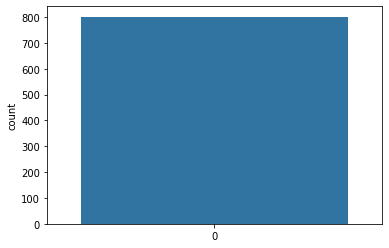

In [36]:
#Plot the unique values
sns.countplot(df["is_legendary"])

In [37]:
#Find null values

df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0
is_legendary           0


In [38]:
#Datatypes

df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense             int64
speed         

Un diagrama de caja o box plot es una forma de mostrar la dispersión y los centros de un conjunto de datos. El box plot es una de las maneras mas representativas para algunos datos. Sin embargo, es o de los menos usados, o de los mas la utilizados. El box plot consiste de varios componentes importantes al representar los diversos cuartiles de una distribución:

a.	Cuartil 1 o percentil 25 – inferior de la caja

b.	Cuartil 2 o percentil 50 – mediana o centro de la distribución

c.	Cuartil 3 o percentil 75 – superior de la caja

d.	Rango intercuartil (las líneas del diagrama)

e.	Los valores extremos definidos en R como Cuartil 3-1.5*IQR para los valores extremos inferiores y Cuartil 3+1.5*IQR para los valores extremos superiores.


<Axes: >

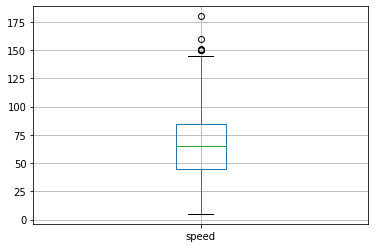

In [41]:
#Boxplot

#df[['is_legendary']].boxplot()
df[['speed']].boxplot()

Text(0.5, 1.0, 'Speed-type relation')

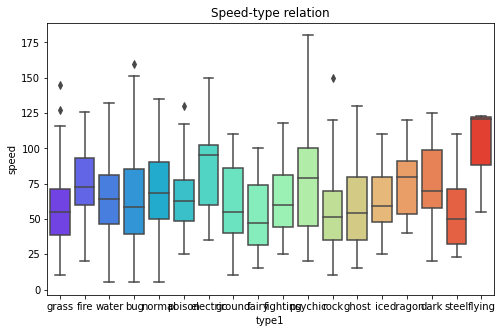

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x='type1',y='speed',data=df, palette='rainbow')
plt.title("Speed-type relation")

Un diagrama o gráfico de dispersión es una visualización de datos bidimensional que utiliza puntos para representar los valores obtenidos para dos variables (usualmente referidos como X y Y): una trazada a lo largo del eje x, y la otra trazada a lo largo del eje y. 

Los diagramas de dispersión son útiles para interpretar tendencias en datos estadísticos y se usan cuando desea mostrar la relación entre dos variables. Los gráficos de dispersión a veces se llaman gráficos de correlación porque, se utilizan para mostrar la correlación entre las variables X y Y.


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='weight_kg', ylabel='hp'>

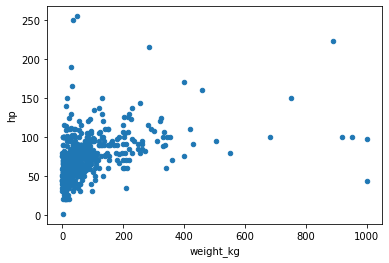

In [45]:
#scatterplot
df.plot(kind='scatter',x='weight_kg',y='hp') # scatter plot

Una matriz de correlación es una tabla que muestra los coeficientes de correlación (coeficiente de correlación de Pearson) entre conjuntos de variables que le permiten a las personas analistas ver qué pares o parejas de atributos tienen la correlación más alta. El coeficiente de correlación puede variar en valor de −1 a +1. Cuanto mayor sea el valor absoluto del coeficiente, más fuerte será la relación entre las variables. En los experimentos nos interesa identificar las relaciones entre las variables dependientes e independientes. Esto es muy importante porque nos facilita saber cuales interacciones o relaciones lienales pueden existir y que vale la pensa analizar con mayor profundiad. Adicionalmente, 2 variables pueden no tener correlaciones fuertes con Y, pero si hacemos ingeniería de variables la nueva variable puede tener una correlación alta. Esto es algo muy importante y justifica la necesidad de comprender el contexto del experimento.

In [46]:
#Correlation 

df.corr()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
against_bug,1.000000,0.230107,0.165430,-0.246943,0.239566,0.137902,0.202778,0.183343,0.129174,0.079197,-0.186841,0.148176,0.215589,0.354255,-0.463272,-0.210522,0.055504,-0.254732,-0.054175,0.062133,0.009994,-0.012398,-0.036474,0.035717,-0.060858,0.034897,-0.048373,0.004618,0.055352,-0.002342,-0.043802,-0.031909,-0.001549,0.027864
against_dark,0.230107,1.000000,0.140830,-0.015830,-0.301354,-0.357981,0.010527,-0.179697,0.672337,-0.006533,-0.007660,-0.010763,-0.413632,-0.236919,-0.230415,0.011963,-0.119758,-0.001976,-0.098849,0.187220,0.024155,0.065446,0.048039,-0.008391,0.019219,0.010589,-0.097547,0.009066,0.170849,0.132507,-0.000326,0.038871,-0.016013,0.136315
against_dragon,0.165430,0.140830,1.000000,-0.108928,0.439705,0.035237,-0.261570,0.064850,-0.049941,-0.037135,-0.120042,0.350048,0.142035,-0.210199,0.100153,0.090184,-0.227697,-0.096549,0.138217,0.164773,-0.151915,0.069766,-0.023794,0.172547,0.164464,0.089721,0.061785,0.000872,0.039739,-0.047416,0.078123,0.126003,-0.025201,0.014844
against_electric,-0.246943,-0.015830,-0.108928,1.000000,-0.089864,-0.102798,-0.279029,-0.111461,-0.073031,0.056209,-0.269444,-0.328531,0.076699,-0.015769,-0.017592,0.417261,-0.187543,-0.297600,-0.104276,-0.061970,0.030411,-0.017137,-0.072433,-0.041584,0.003068,-0.035354,0.051265,-0.068552,0.022305,0.019193,0.111422,-0.102926,-0.063180,-0.023151
against_fairy,0.239566,-0.301354,0.439705,-0.089864,1.000000,0.157712,-0.169489,0.199862,-0.120806,0.052899,-0.256504,0.273650,0.149488,0.146464,-0.145238,-0.205444,0.130323,-0.218937,0.207526,0.120594,-0.209323,0.098948,0.001655,0.146370,0.115360,0.129284,0.010527,0.176651,-0.010296,0.002754,0.065401,0.098523,0.150801,0.050165
against_fight,0.137902,-0.357981,0.035237,-0.102798,0.157712,1.000000,-0.076480,-0.318941,-0.546982,0.269157,0.358793,-0.220239,-0.006997,-0.189798,-0.264938,-0.240964,0.165066,0.205249,0.149123,-0.006359,-0.088722,0.048629,0.150424,0.010407,0.059184,0.109425,0.048101,0.018296,-0.118481,-0.044460,-0.050495,0.161564,0.000681,-0.059132
against_fire,0.202778,0.010527,-0.261570,-0.279029,-0.169489,-0.076480,1.000000,0.528127,0.050570,-0.463634,-0.260766,0.186361,-0.055106,0.184334,-0.018519,0.120747,0.115992,-0.242635,-0.005762,-0.044802,0.007441,-0.061698,0.037921,-0.027136,-0.085808,-0.099242,-0.120378,0.052012,-0.088578,-0.019520,-0.079129,-0.044124,0.061157,-0.011073
against_flying,0.183343,-0.179697,0.064850,-0.111461,0.199862,-0.318941,0.528127,1.000000,0.013204,-0.358467,-0.465010,0.277935,0.266780,0.484843,0.375023,0.161885,0.001264,-0.311997,-0.002991,-0.091304,0.056480,-0.106586,-0.127950,0.019100,-0.072985,-0.060624,0.022895,0.020324,-0.111243,-0.079022,-0.043381,-0.126744,0.058204,-0.062214
against_ghost,0.129174,0.672337,-0.049941,-0.073031,-0.120806,-0.546982,0.050570,0.013204,1.000000,0.029542,0.093727,-0.052531,-0.404780,-0.105137,-0.084496,-0.061013,-0.002008,0.009046,-0.034549,0.174115,-0.037205,0.114179,0.136490,0.059262,0.032553,-0.062052,0.059852,0.063189,0.233309,0.195439,-0.029007,0.047869,0.038027,0.170746
against_grass,0.079197,-0.006533,-0.037135,0.056209,0.052899,0.269157,-0.463634,-0.358467,0.029542,1.000000,0.195064,-0.239682,-0.127550,-0.221946,-0.093657,-0.375177,0.082812,0.229968,0.036787,-0.064971,0.063475,-0.017340,0.139542,-0.039623,0.030583,0.056886,0.070926,-0.092353,-0.093899,-0.056427,-0.153618,0.050129,-0.107987,-0.070826


Un mapa de calor se puede definir como tablas con colores en lugar de números, donde una escala colorimétrica representa un rango de valores continuos (escala de grises en lugar de valores de 0 a 1). Con base e esto podemos entender entonces que port ejemplo el valor más bajo se establece en azul oscuro, el valor más alto en rojo y los valores de rango medio en blanco, con una transición (o gradiente) correspondiente entre estos extremos.

Los mapas de calor son muy usados para visualizar cantidades de datos multidimensionales. Esta característica los hace parte del conjunto de herramientas que permiten explorar e identificar tendencias relevantes en un conjunto de datos. Por ejemplo, a través de los mapas de calor podemos identificar identificar grupos de filas con valores similares, ya que se muestran como áreas de color similar. Esto permite identificar:

a.	Variables que poseen una relación

b.	Variables a las que les podemos hacer ingeniería (reducción)


<Axes: xlabel='type2', ylabel='type1'>

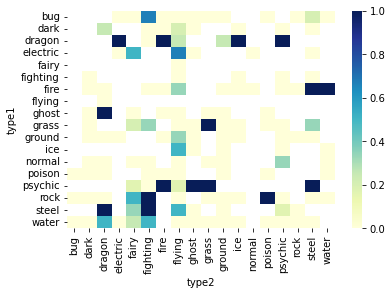

In [47]:
#heatmap1_data = pd.pivot_table(df, values='hp', 
#                     index=['generation'], 
#                     columns='abilities')

heatmap1_data = pd.pivot_table(df, values='is_legendary', 
                     index=['type1'], 
                     columns='type2')

sns.heatmap(heatmap1_data, cmap="YlGnBu")

<Axes: >

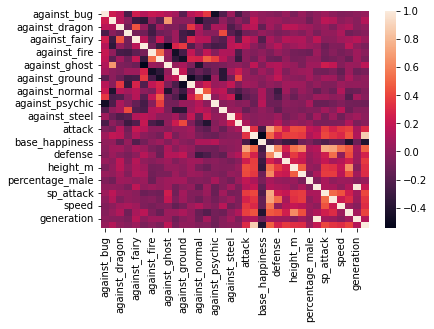

In [48]:
#Correlation plot

sns.heatmap(df.corr())

<ipython-input-49-60807070e574>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['is_legendary'], hist=True, kde=True,


<Axes: xlabel='is_legendary', ylabel='Density'>

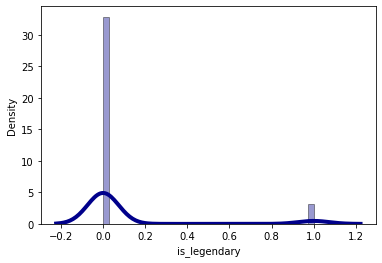

In [49]:
sns.distplot(df['is_legendary'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Un diagrama de densidad visualiza la distribución de datos en un intervalo continuo. Este gráfico es una variación de un histograma que utiliza el suavizado del núcleo para trazar valores, lo que permite distribuciones más uniformes al suavizar el ruido. Los picos de un gráfico de densidad ayudan a mostrar dónde se concentran los valores durante el intervalo.

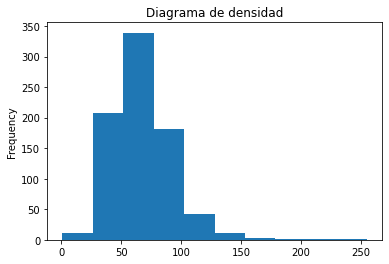

In [53]:
#Diagramas de densidad
#df.generation.plot.density(color='green') 
df.hp.plot.hist()
#df.Day.plot.hist()
plt.title('Diagrama de densidad') 
plt.show()

In [54]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 KB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.

In [55]:
from dataprep.eda import create_report
create_report(df)

Output hidden; open in https://colab.research.google.com to view.